In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
plt.style.use("bmh")

In [2]:
desperdicio= pd.read_csv("FAO_Desperdicio_Alimentar.csv", low_memory=False, parse_dates=["year"])

# Exploratory Analysis and Data Cleaning

In [3]:
desperdicio.head()

m49_code  country region cpc_code                      commodity  \
0       104  Myanmar    NaN     0142  Groundnuts, excluding shelled   
1       104  Myanmar    NaN     0142  Groundnuts, excluding shelled   
2       104  Myanmar    NaN     0142  Groundnuts, excluding shelled   
3       104  Myanmar    NaN     0142  Groundnuts, excluding shelled   
4       104  Myanmar    NaN     0142  Groundnuts, excluding shelled   

        year  loss_percentage loss_percentage_original loss_quantity activity  \
0 2009-01-01             5.22                    5.22%         68100      NaN   
1 2008-01-01             5.43                    5.43%         65240      NaN   
2 2007-01-01             5.61                    5.61%         61080      NaN   
3 2006-01-01             5.40                     5.4%         55270      NaN   
4 2005-01-01             5.00                       5%         51970      NaN   

    food_supply_stage treatment cause_of_loss sample_size  \
0  Whole supply chain       NaN           NaN         NaN   
1  Whole supply chain       NaN           NaN         NaN   
2  Whole supply chain       NaN           NaN         NaN   
3  Whole supply chain       NaN           NaN         NaN   
4  Whole supply chain       NaN           NaN         NaN   

                              method_data_collection    reference  url notes  
0  FAO's annual Agriculture Production Questionna...  FAO Sources  NaN   NaN  
1  FAO's annual Agriculture Production Questionna...  FAO Sources  NaN   NaN  
2  FAO's annual Agriculture Production Questionna...  FAO Sources  NaN   NaN  
3  FAO's annual Agriculture Production Questionna...  FAO Sources  NaN   NaN  
4  FAO's annual Agriculture Production Questionna...  FAO Sources  NaN   NaN

In [4]:
desperdicio.shape

(32947, 18)

In [5]:
desperdicio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32947 entries, 0 to 32946
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   m49_code                  32947 non-null  int64         
 1   country                   32947 non-null  object        
 2   region                    974 non-null    object        
 3   cpc_code                  32947 non-null  object        
 4   commodity                 32947 non-null  object        
 5   year                      32947 non-null  datetime64[ns]
 6   loss_percentage           32947 non-null  float64       
 7   loss_percentage_original  32947 non-null  object        
 8   loss_quantity             7444 non-null   object        
 9   activity                  21036 non-null  object        
 10  food_supply_stage         32875 non-null  object        
 11  treatment                 971 non-null    object        
 12  cause_of_loss     

In [6]:
desperdicio.describe()

m49_code  loss_percentage
count  32947.000000     32947.000000
mean     490.287978         5.151613
std      267.932473         6.957487
min        2.000000         0.003000
25%      250.000000         1.650000
50%      478.000000         2.910000
75%      729.000000         5.000000
max      894.000000        65.000000

In [7]:
skim(desperdicio)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 32947  │ │ string      │ 15    │                                                          │
│ │ Number of columns │ 18     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name             ┃ NA   ┃ NA %    ┃ mean    ┃ sd    ┃ p0       ┃ p25   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ m49_code                │    0 │       0 │     490 │   270 │        2 │   250 │   730 │     890 │  ▅▅▅▅▅█  │  │
│ │ loss_percentage         │    0 │       0 │     5.2 │     7 │    0.003 │   1.6 │     5 │      65 │    █▁    │  │
│ └─────────────────────────┴──────┴─────────┴─────────┴───────┴──────────┴───────┴───────┴─────────┴──────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ year                   │      0 │         0 │     1966-01-01      │     2021-01-01      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA         ┃ NA %     ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ country                             │          0 │        0 │                     1.6 │              52000 │  │
│ │ region                              │      32000 │       97 │                     1.6 │              52000 │  │
│ │ cpc_code                            │          0 │        0 │                     1.6 │              52000 │  │
│ │ commodity                           │          0 │        0 │                     1.6 │              52000 │  │
│ │ loss_percentage_orig                │          0 │        0 │                     1.6 │              52000 │  │
│ │ loss_quantity                       │      26000 │       77 │                     1.6 │              52000 │  │
│ │ activity                            │      12000 │       36 │                     1.6 │              52000 │  │
│ │ food_supply_stage                   │         72 │  

In [8]:
desperdicio.head()

m49_code  country region cpc_code                      commodity  \
0       104  Myanmar    NaN     0142  Groundnuts, excluding shelled   
1       104  Myanmar    NaN     0142  Groundnuts, excluding shelled   
2       104  Myanmar    NaN     0142  Groundnuts, excluding shelled   
3       104  Myanmar    NaN     0142  Groundnuts, excluding shelled   
4       104  Myanmar    NaN     0142  Groundnuts, excluding shelled   

        year  loss_percentage loss_percentage_original loss_quantity activity  \
0 2009-01-01             5.22                    5.22%         68100      NaN   
1 2008-01-01             5.43                    5.43%         65240      NaN   
2 2007-01-01             5.61                    5.61%         61080      NaN   
3 2006-01-01             5.40                     5.4%         55270      NaN   
4 2005-01-01             5.00                       5%         51970      NaN   

    food_supply_stage treatment cause_of_loss sample_size  \
0  Whole supply chain       NaN           NaN         NaN   
1  Whole supply chain       NaN           NaN         NaN   
2  Whole supply chain       NaN           NaN         NaN   
3  Whole supply chain       NaN           NaN         NaN   
4  Whole supply chain       NaN           NaN         NaN   

                              method_data_collection    reference  url notes  
0  FAO's annual Agriculture Production Questionna...  FAO Sources  NaN   NaN  
1  FAO's annual Agriculture Production Questionna...  FAO Sources  NaN   NaN  
2  FAO's annual Agriculture Production Questionna...  FAO Sources  NaN   NaN  
3  FAO's annual Agriculture Production Questionna...  FAO Sources  NaN   NaN  
4  FAO's annual Agriculture Production Questionna...  FAO Sources  NaN   NaN

In [9]:
# Drop some columns
desperdicio.drop(columns=["m49_code","region","cpc_code","commodity","activity","food_supply_stage","treatment","cause_of_loss","sample_size","method_data_collection","reference","url","notes"], inplace=True)
desperdicio.head()

country       year  loss_percentage loss_percentage_original loss_quantity
0  Myanmar 2009-01-01             5.22                    5.22%         68100
1  Myanmar 2008-01-01             5.43                    5.43%         65240
2  Myanmar 2007-01-01             5.61                    5.61%         61080
3  Myanmar 2006-01-01             5.40                     5.4%         55270
4  Myanmar 2005-01-01             5.00                       5%         51970

In [10]:
desperdicio.rename(columns={"year":"date"},inplace=True)

In [11]:
#Let´s create a "year" column
desperdicio["year"]=desperdicio["date"].dt.year

In [12]:
desperdicio.head()

country       date  loss_percentage loss_percentage_original loss_quantity  \
0  Myanmar 2009-01-01             5.22                    5.22%         68100   
1  Myanmar 2008-01-01             5.43                    5.43%         65240   
2  Myanmar 2007-01-01             5.61                    5.61%         61080   
3  Myanmar 2006-01-01             5.40                     5.4%         55270   
4  Myanmar 2005-01-01             5.00                       5%         51970   

   year  
0  2009  
1  2008  
2  2007  
3  2006  
4  2005

__Web sraping data of the continets of each county to crate a column "continet"__

In [13]:

from bs4 import BeautifulSoup
import requests

url = 'https://wisevoter.com/country-rankings/countries-by-continent/'
web = requests.get(url)
soup = BeautifulSoup(web.content, "html.parser")
soup

<!DOCTYPE html>
<html class="no-js" lang="en-US"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><link href="https://gmpg.org/xfn/11" rel="profile"/><meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"><title>Countries by Continent 2023 - Wisevoter</title><link href="https://wisevoter.com/country-rankings/countries-by-continent/" rel="canonical"><meta content="en_US" property="og:locale"><meta content="article" property="og:type"/><meta content="Countries by Continent 2023 - Wisevoter" property="og:title"/><meta content="There are seven continents in the world, each with its unique geography, climate, culture, and history. North America is home to some of the most famous countries globally, including the United States, Canada, and Mexico. The United States is the world’s most influential superpower, with a diverse population, rich history, and vibrant culture. Canada is […]" proper

In [14]:
tableHead=soup.thead
tableHead

<thead><tr><th>Country</th><th>Continent</th></tr></thead>

In [15]:
row_headers= []
for x in tableHead.find_all("tr"):
    for y in x.find_all("th"):
        row_headers.append(y.text)
row_headers

['Country', 'Continent']

In [16]:
tableBody= soup.tbody
tableBody

<tbody><tr><td class="shdb-on-page-table-body-Geo">Algeria</td><td class="shdb-on-page-table-body-Data" data-order="1">Africa</td></tr><tr><td class="shdb-on-page-table-body-Geo">Angola</td><td class="shdb-on-page-table-body-Data" data-order="2">Africa</td></tr><tr><td class="shdb-on-page-table-body-Geo">Benin</td><td class="shdb-on-page-table-body-Data" data-order="3">Africa</td></tr><tr><td class="shdb-on-page-table-body-Geo">Botswana</td><td class="shdb-on-page-table-body-Data" data-order="4">Africa</td></tr><tr><td class="shdb-on-page-table-body-Geo">Burkina Faso</td><td class="shdb-on-page-table-body-Data" data-order="5">Africa</td></tr><tr><td class="shdb-on-page-table-body-Geo">Burundi</td><td class="shdb-on-page-table-body-Data" data-order="6">Africa</td></tr><tr><td class="shdb-on-page-table-body-Geo">Cameroon</td><td class="shdb-on-page-table-body-Data" data-order="7">Africa</td></tr><tr><td class="shdb-on-page-table-body-Geo">Cape Verde</td><td class="shdb-on-page-table-body

In [17]:
tableValues=[]
for x in tableBody.find_all("tr")[1:]:
    td_tags=x.find_all("td")
    td_val=[y.text for y in td_tags]
    tableValues.append(td_val)
tableValues

[['Angola', 'Africa'],
 ['Benin', 'Africa'],
 ['Botswana', 'Africa'],
 ['Burkina Faso', 'Africa'],
 ['Burundi', 'Africa'],
 ['Cameroon', 'Africa'],
 ['Cape Verde', 'Africa'],
 ['Central African Republic', 'Africa'],
 ['Chad', 'Africa'],
 ['Comoros', 'Africa'],
 ['Democratic Republic of the Congo', 'Africa'],
 ['Djibouti', 'Africa'],
 ['Egypt', 'Africa'],
 ['Equatorial Guinea', 'Africa'],
 ['Eritrea', 'Africa'],
 ['Ethiopia', 'Africa'],
 ['Gabon', 'Africa'],
 ['Ghana', 'Africa'],
 ['Guinea', 'Africa'],
 ['Guinea-Bissau', 'Africa'],
 ['Ivory Coast', 'Africa'],
 ['Kenya', 'Africa'],
 ['Lesotho', 'Africa'],
 ['Liberia', 'Africa'],
 ['Libya', 'Africa'],
 ['Madagascar', 'Africa'],
 ['Malawi', 'Africa'],
 ['Mali', 'Africa'],
 ['Mauritania', 'Africa'],
 ['Mauritius', 'Africa'],
 ['Morocco', 'Africa'],
 ['Mozambique', 'Africa'],
 ['Namibia', 'Africa'],
 ['Niger', 'Africa'],
 ['Nigeria', 'Africa'],
 ['Republic of the Congo', 'Africa'],
 ['Rwanda', 'Africa'],
 ['Saint Helena', 'Africa'],
 ['Seneg

In [18]:
continets=pd.DataFrame(tableValues, columns=row_headers)
continets.rename(columns={"Country":"country"},inplace=True)
continets

country      Continent
0          Angola         Africa
1           Benin         Africa
2        Botswana         Africa
3    Burkina Faso         Africa
4         Burundi         Africa
..            ...            ...
223      Paraguay  South America
224          Peru  South America
225      Suriname  South America
226       Uruguay  South America
227     Venezuela  South America

[228 rows x 2 columns]

In [19]:
#continets["Continent"]=continets[continets["country"]=="Russia"]["Continent"].str.replace("Europe","Asia")

In [20]:
#continets[continets["country"]=="Russia"]

In [21]:
desperdicio

country       date  loss_percentage loss_percentage_original  \
0      Myanmar 2009-01-01             5.22                    5.22%   
1      Myanmar 2008-01-01             5.43                    5.43%   
2      Myanmar 2007-01-01             5.61                    5.61%   
3      Myanmar 2006-01-01             5.40                     5.4%   
4      Myanmar 2005-01-01             5.00                       5%   
...        ...        ...              ...                      ...   
32942   Zambia 1977-01-01             4.05                  1.7-6.4   
32943   Zambia 1977-01-01             3.00                        3   
32944   Zambia 1977-01-01             3.50                    2.0-5   
32945   Zambia 1977-01-01            13.00                       13   
32946   Zambia 1977-01-01             9.00                        9   

      loss_quantity  year  
0             68100  2009  
1             65240  2008  
2             61080  2007  
3             55270  2006  
4             51970  2005  
...             ...   ...  
32942           NaN  1977  
32943           NaN  1977  
32944           NaN  1977  
32945           NaN  1977  
32946           NaN  1977  

[32947 rows x 6 columns]

In [22]:
#Let´s merge the data "continets" to our data to create a column continet
desperdicio= desperdicio.merge(continets,how="left",left_on="country",right_on="country")
desperdicio.rename(columns={"Continent":"continent"},inplace=True)
desperdicio

country       date  loss_percentage loss_percentage_original  \
0      Myanmar 2009-01-01             5.22                    5.22%   
1      Myanmar 2008-01-01             5.43                    5.43%   
2      Myanmar 2007-01-01             5.61                    5.61%   
3      Myanmar 2006-01-01             5.40                     5.4%   
4      Myanmar 2005-01-01             5.00                       5%   
...        ...        ...              ...                      ...   
32942   Zambia 1977-01-01             4.05                  1.7-6.4   
32943   Zambia 1977-01-01             3.00                        3   
32944   Zambia 1977-01-01             3.50                    2.0-5   
32945   Zambia 1977-01-01            13.00                       13   
32946   Zambia 1977-01-01             9.00                        9   

      loss_quantity  year continent  
0             68100  2009      Asia  
1             65240  2008      Asia  
2             61080  2007      Asia  
3             55270  2006      Asia  
4             51970  2005      Asia  
...             ...   ...       ...  
32942           NaN  1977    Africa  
32943           NaN  1977    Africa  
32944           NaN  1977    Africa  
32945           NaN  1977    Africa  
32946           NaN  1977    Africa  

[32947 rows x 7 columns]

In [23]:
desperdicio["continent"].isna().sum()

2854

In [24]:
desperdicio[desperdicio["continent"].isna()]["country"].value_counts()

Venezuela (Bolivarian Republic of)                      679
United Republic of Tanzania                             554
Gambia                                                  506
Côte d'Ivoire                                           406
United Kingdom of Great Britain and Northern Ireland    128
China                                                   119
Iran (Islamic Republic of)                              113
Russian Federation                                       72
Republic of Korea                                        60
Bolivia (Plurinational State of)                         38
The former Yugoslav Republic of Macedonia                28
Viet Nam                                                 20
Republic of Moldova                                      16
Syrian Arab Republic                                     15
Europe                                                   14
Sub-Saharan Africa                                       12
Timor-Leste                             

__Let´s clean some country data__

In [25]:
desperdicio.loc[desperdicio["country"].isin(["Venezuela (Bolivarian Republic of)"]),"country"]="Venezuela"

In [26]:
desperdicio.loc[desperdicio["country"].isin(["United Republic of Tanzania"]),"country"]="Tanzania"

In [27]:
desperdicio.loc[desperdicio["country"].isin(["Côte d'Ivoire"]),"country"]="Ivory Coast"

In [28]:
desperdicio.loc[desperdicio["country"].isin(["United Kingdom of Great Britain and Northern Ireland"]),"country"]="United Kingdom"

In [29]:
desperdicio.loc[desperdicio["country"].isin(["Iran (Islamic Republic of)"]),"country"]="Iran"

In [30]:
desperdicio.loc[desperdicio["country"].isin(["Russian Federation"]),"country"]="Russia"

In [31]:
desperdicio.loc[desperdicio["country"].isin(["Republic of Korea"]),"country"]="South Korea"

In [32]:
desperdicio.loc[desperdicio["country"].isin(["Bolivia (Plurinational State of)"]),"country"]="Bolivia"

In [33]:
desperdicio.loc[desperdicio["country"].isin(["The former Yugoslav Republic of Macedonia"]),"country"]="North Macedonia"

In [34]:
desperdicio.loc[desperdicio["country"].isin(["Viet Nam"]),"country"]="Vietnam"

In [35]:
desperdicio.loc[desperdicio["country"].isin(["Republic of Moldova"]),"country"]="Moldava"

In [36]:
desperdicio.loc[desperdicio["country"].isin(["Syrian Arab Republic"]),"country"]="Syria"

In [37]:
desperdicio.loc[desperdicio["country"].isin(["Syrian Arab Republic"]),"country"]="Syria"

In [38]:
desperdicio.loc[desperdicio["country"].isin(["Democratic People's Republic of Korea"]),"country"]="North Korea"

In [39]:
desperdicio.loc[desperdicio["country"].isin(["China,Taiwan"]),"country"]="China"

In [40]:
desperdicio.loc[desperdicio["country"].isin(["Lao People's Democratic Republic"]),"country"]="Laos"

In [41]:
desperdicio.drop(columns="continent", inplace=True)

In [42]:
desperdicio= desperdicio.merge(continets,how="left",left_on="country",right_on="country")
desperdicio.rename(columns={"Continent":"continent"},inplace=True)
desperdicio

country       date  loss_percentage loss_percentage_original  \
0      Myanmar 2009-01-01             5.22                    5.22%   
1      Myanmar 2008-01-01             5.43                    5.43%   
2      Myanmar 2007-01-01             5.61                    5.61%   
3      Myanmar 2006-01-01             5.40                     5.4%   
4      Myanmar 2005-01-01             5.00                       5%   
...        ...        ...              ...                      ...   
32942   Zambia 1977-01-01             4.05                  1.7-6.4   
32943   Zambia 1977-01-01             3.00                        3   
32944   Zambia 1977-01-01             3.50                    2.0-5   
32945   Zambia 1977-01-01            13.00                       13   
32946   Zambia 1977-01-01             9.00                        9   

      loss_quantity  year continent  
0             68100  2009      Asia  
1             65240  2008      Asia  
2             61080  2007      Asia  
3             55270  2006      Asia  
4             51970  2005      Asia  
...             ...   ...       ...  
32942           NaN  1977    Africa  
32943           NaN  1977    Africa  
32944           NaN  1977    Africa  
32945           NaN  1977    Africa  
32946           NaN  1977    Africa  

[32947 rows x 7 columns]

In [43]:
desperdicio["continent"].isna().sum()

760

In [44]:
desperdicio[desperdicio["continent"].isna()]["country"].value_counts()

Gambia                             506
China                              124
North Macedonia                     28
Moldava                             16
Europe                              14
Sub-Saharan Africa                  12
Timor-Leste                         11
Latin America and the Caribbean      5
Central Asia                         5
Western Asia                         5
Northern Africa                      5
Northern America                     5
Southern Asia                        5
South-Eastern Asia                   5
Western Africa                       4
Czechia                              4
Australia and New Zealand            3
Algeria                              2
Africa                               1
Name: country, dtype: int64

In [45]:
# Let´s fill the NaN values
continents = {
    "Gambia": "Africa",
    "China": "Asia",
    "North Macedonia": "Europe",
    "Moldava": "Europe",
    "Europe": "Europe",
    "Sub-Saharan Africa": "Africa",
    "Timor-Leste": "Asia",
    "Latin America and the Caribbean": "South America",
    "Central Asia": "Asia",
    "Western Asia": "Asia",
    "Northern Africa": "Africa",
    "Northern America": "North America",
    "Southern Asia": "Asia",
    "South-Eastern Asia": "Asia",
    "Western Africa": "Africa",
    "Czechia": "Europe",
    "Australia and New Zealand": "Oceania",
    "Algeria": "Africa",
    "Africa": "Africa"
}
desperdicio["continent"] = desperdicio["continent"].fillna(desperdicio["country"].map(continents))


In [46]:
desperdicio["continent"].value_counts()

Africa           19576
North America     4688
Asia              3773
Europe            2982
South America     1795
Oceania            133
Name: continent, dtype: int64

In [47]:
desperdicio["continent"].isna().sum()

0

In [48]:
# Let´s cerate a "continent_code" column
continent_codes = {
    "Africa": "AF",
    "Asia": "AS",
    "Europe": "EU",
    "North America": "NA",
    "Oceania": "OC",
    "South America": "SA"
}

desperdicio["continent_code"] = desperdicio["continent"].map(continent_codes)

In [49]:
desperdicio.head()

country       date  loss_percentage loss_percentage_original loss_quantity  \
0  Myanmar 2009-01-01             5.22                    5.22%         68100   
1  Myanmar 2008-01-01             5.43                    5.43%         65240   
2  Myanmar 2007-01-01             5.61                    5.61%         61080   
3  Myanmar 2006-01-01             5.40                     5.4%         55270   
4  Myanmar 2005-01-01             5.00                       5%         51970   

   year continent continent_code  
0  2009      Asia             AS  
1  2008      Asia             AS  
2  2007      Asia             AS  
3  2006      Asia             AS  
4  2005      Asia             AS

In [50]:
desperdicio["continent_code"].isna().sum()

0

In [51]:
desperdicio["country"].nunique()

156

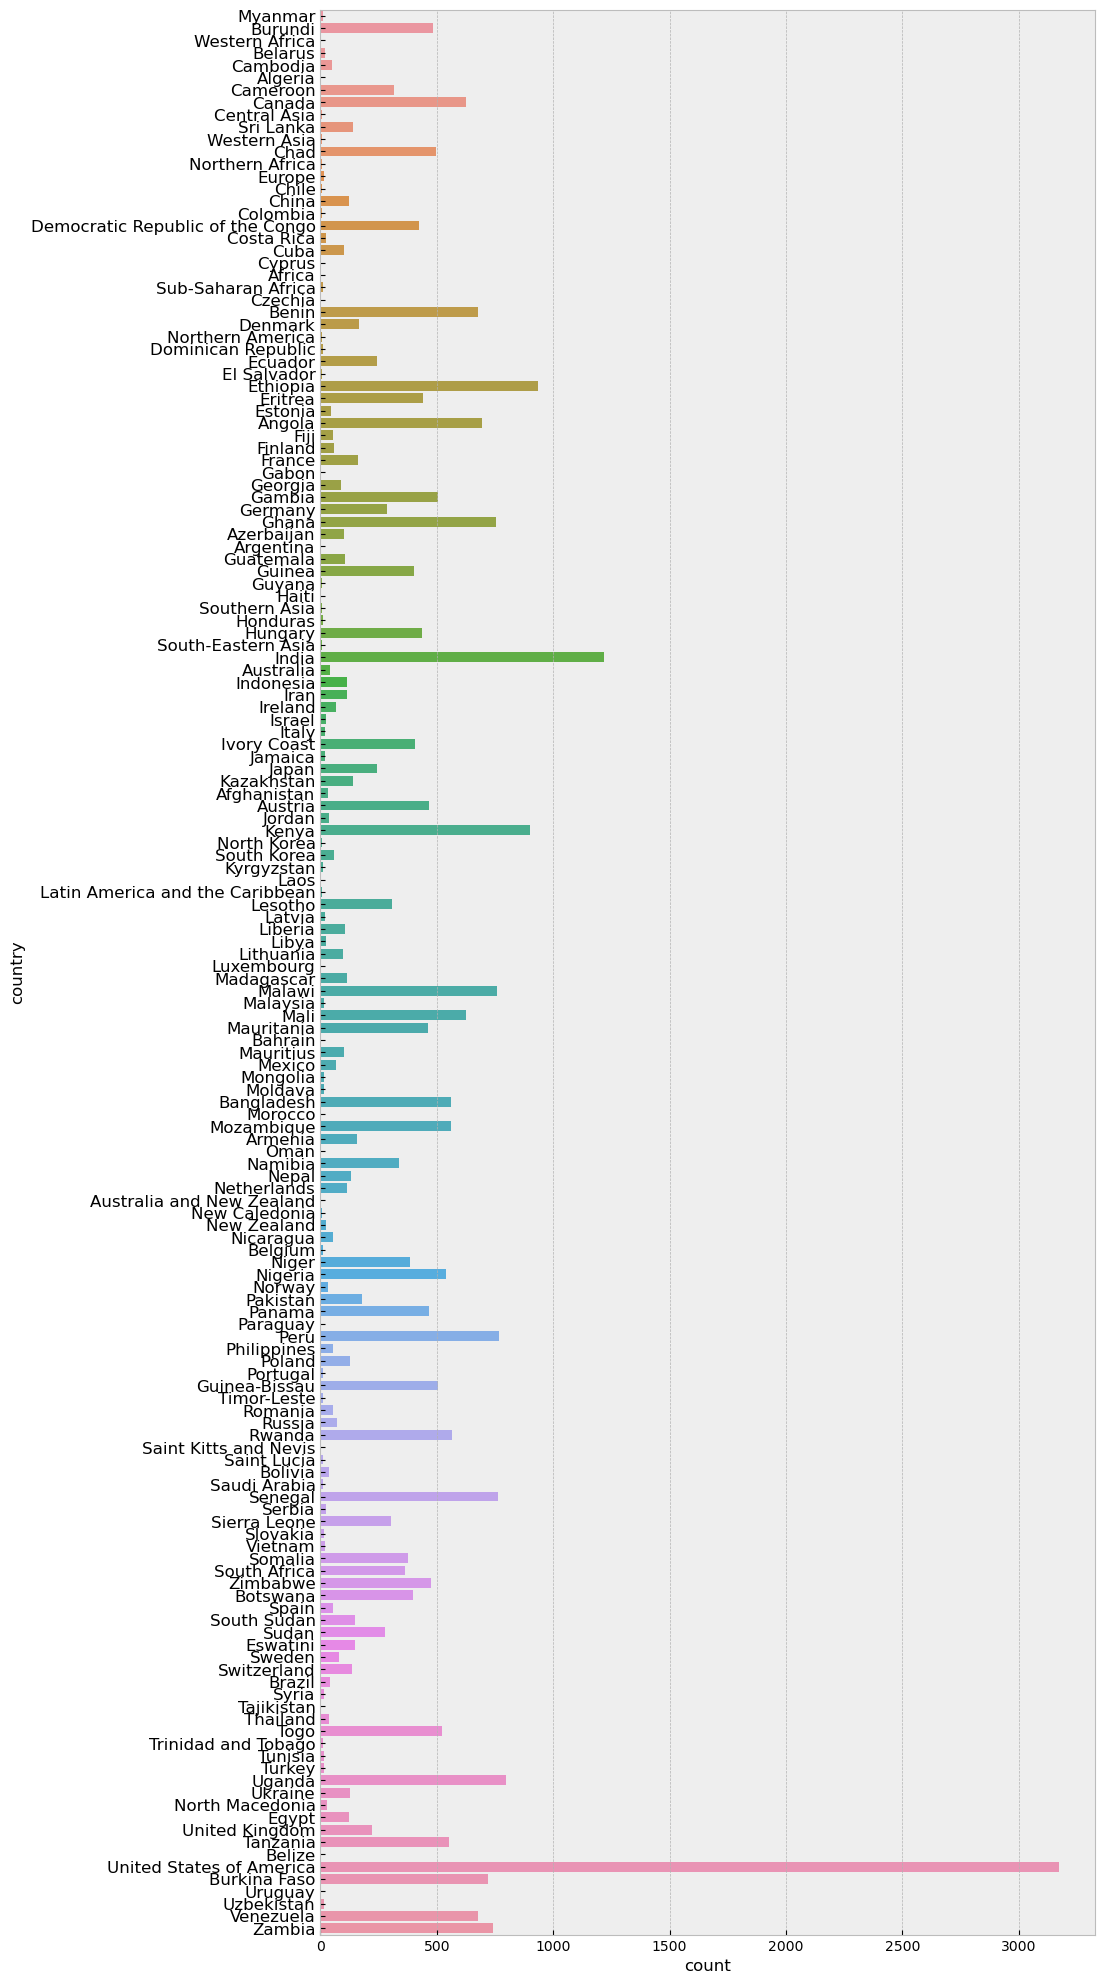

In [52]:
plt.figure(figsize=(10,25))
sns.countplot(y="country",data=desperdicio)
plt.yticks(fontsize=12)
plt.show()

# Global Food Loss

## Global food losses per year

In [53]:
global_loss=desperdicio.groupby("year").agg(Mean_loss_percentage=("loss_percentage","mean"))
global_loss["Mean_loss_percentage"].round(2)
global_loss

Mean_loss_percentage
year                      
1966             12.000000
1968              5.400000
1969             15.200000
1970              9.245218
1971              9.087935
1972              9.087310
1973             10.553036
1974              9.877942
1975              8.931498
1976              9.813165
1977             10.580326
1978              7.447435
1979              8.749344
1980              8.096030
1981              8.391802
1982             10.844715
1983             10.746011
1984             10.786127
1985             12.426811
1986             11.739544
1987              8.982750
1988             10.056415
1989             10.324566
1990              9.755707
1991              9.286319
1992              8.942531
1993              9.239636
1994              9.559761
1995              8.865493
1996              8.053914
1997              7.729804
1998              8.112810
1999              7.648444
2000              4.212036
2001              4.692385
2002              4.559210
2003              4.592237
2004              4.120676
2005              4.762426
2006              3.736588
2007              3.987764
2008              5.273055
2009              4.918205
2010              5.789808
2011              4.358375
2012              4.167849
2013              5.877748
2014              3.843808
2015              4.327060
2016              4.200144
2017              4.241309
2018              4.310392
2019              3.211209
2020              2.799246
2021              6.296923

In [54]:
global_loss.to_excel("Desperdicio_por_Ano.xlsx")

In [55]:
global_loss["Mean_loss_percentage"].max()

15.2

In [56]:
global_loss[global_loss["Mean_loss_percentage"]==15.2]

Mean_loss_percentage
year                      
1969                  15.2

In [57]:
global_loss["Mean_loss_percentage"].min()

2.7992459396751737

In [58]:
global_loss[global_loss["Mean_loss_percentage"]==2.7992459396751737]

Mean_loss_percentage
year                      
2020              2.799246

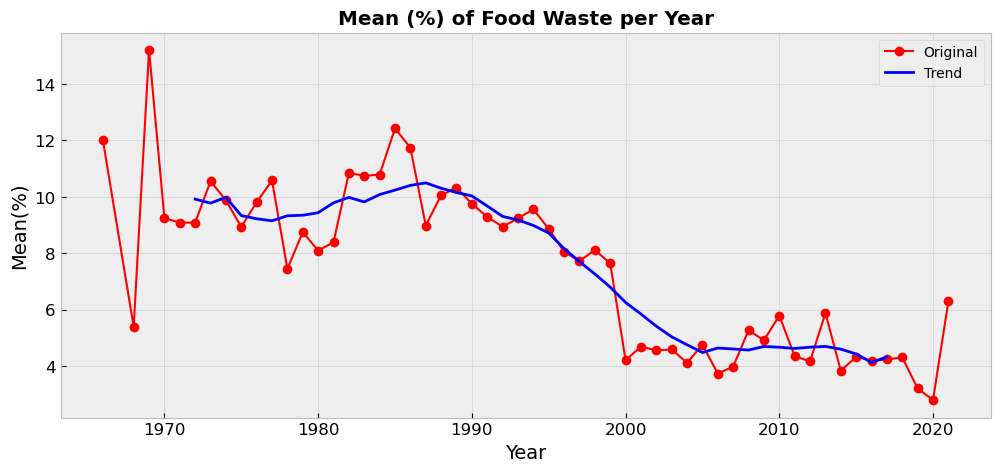

In [59]:
global_loss.plot(figsize=(12,5), color="red", marker="o", linewidth=1.5)
rolling_mean = global_loss['Mean_loss_percentage'].rolling(window=10, center=True).mean()
rolling_mean.plot(color='blue', linewidth=2.0)
plt.grid(True, linestyle='-', alpha=0.5)

plt.title("Mean (%) of Food Waste per Year", fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Mean(%)",fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(["Original", "Trend"])

plt.show()

As we cann see the year with the highest food lost was 1969 with 15.2% and the year 2020 was the year with the lowest food lost, with a value of +/- 2.8%.

Analyzing the years between 1966 and 2021 and more specific the blue line that refers to the rooling mean, it appears that is a trend to decrease the quantity of food lost per year.

# Countries with The Most Quantity of Food Waste

In [60]:
countries=desperdicio.groupby("country").agg(Mean_percentage=("loss_percentage","mean"))
countries.reset_index(inplace=True)
countries["Mean_percentage"].round(2)

0      13.12
1      30.00
2      17.50
3       2.52
4       2.60
       ...  
151     8.17
152     3.75
153    14.80
154     2.76
155     3.13
Name: Mean_percentage, Length: 156, dtype: float64

In [61]:
countries_top=countries.sort_values(by="Mean_percentage",ascending=False).head(22)
countries_top.drop(countries[countries["country"]=="Africa"].index,inplace=True)

In [62]:
desperdicio[desperdicio["country"]=="Australia and New Zealand"]

country       date  loss_percentage  \
17593  Australia and New Zealand 2014-01-01             38.0   
17594  Australia and New Zealand 2014-01-01             38.0   
17595  Australia and New Zealand 2014-01-01             50.0   

      loss_percentage_original loss_quantity  year continent continent_code  
17593                      38%           NaN  2014   Oceania             OC  
17594                      38%           NaN  2014   Oceania             OC  
17595                      50%           NaN  2014   Oceania             OC

In [63]:
countries_top.drop(countries[countries["country"]=="Australia and New Zealand"].index,inplace=True)

In [64]:
countries_top["Mean_percentage"].round(2)
countries_top

country  Mean_percentage
56                   Haiti        42.500000
47                   Gabon        35.000000
105                   Oman        35.000000
116  Saint Kitts and Nevis        30.000000
14                  Belize        28.333333
10                 Bahrain        25.000000
141    Trinidad and Tobago        22.944444
148                Uruguay        21.700000
109                   Peru        21.321134
66                 Jamaica        20.344000
77                   Libya        18.640000
6                Australia        18.402326
2                  Algeria        17.500000
118           Saudi Arabia        17.291667
86                  Mexico        16.556354
117            Saint Lucia        16.300000
108               Paraguay        15.875000
29              Costa Rica        15.217727
100            North Korea        15.052000
153           Western Asia        14.800000

In [65]:
countries_top.to_excel("Top_countries.xlsx")

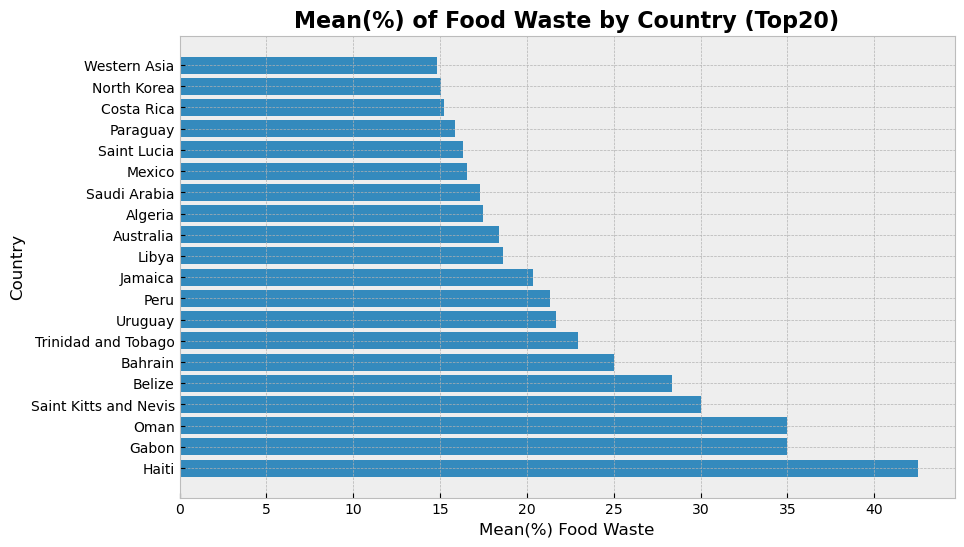

In [66]:
plt.figure(figsize=(10,6))
plt.barh(countries_top["country"],countries_top["Mean_percentage"])

plt.title("Mean(%) of Food Waste by Country (Top20)", fontweight="bold", fontsize=16)
plt.xlabel("Mean(%) Food Waste", fontsize=12)
plt.ylabel("Country",fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# Food Waste by Continent

In [67]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [68]:
desperdicio

country       date  loss_percentage loss_percentage_original  \
0      Myanmar 2009-01-01             5.22                    5.22%   
1      Myanmar 2008-01-01             5.43                    5.43%   
2      Myanmar 2007-01-01             5.61                    5.61%   
3      Myanmar 2006-01-01             5.40                     5.4%   
4      Myanmar 2005-01-01             5.00                       5%   
...        ...        ...              ...                      ...   
32942   Zambia 1977-01-01             4.05                  1.7-6.4   
32943   Zambia 1977-01-01             3.00                        3   
32944   Zambia 1977-01-01             3.50                    2.0-5   
32945   Zambia 1977-01-01            13.00                       13   
32946   Zambia 1977-01-01             9.00                        9   

      loss_quantity  year continent continent_code  
0             68100  2009      Asia             AS  
1             65240  2008      Asia             AS  
2             61080  2007      Asia             AS  
3             55270  2006      Asia             AS  
4             51970  2005      Asia             AS  
...             ...   ...       ...            ...  
32942           NaN  1977    Africa             AF  
32943           NaN  1977    Africa             AF  
32944           NaN  1977    Africa             AF  
32945           NaN  1977    Africa             AF  
32946           NaN  1977    Africa             AF  

[32947 rows x 8 columns]

In [69]:
continent= desperdicio.groupby(["continent"]).agg(Mean_percentage=("loss_percentage","mean"))
continent.sort_values(by="Mean_percentage",inplace=True)
continent["Mean_percentage"].round(2)

continent
Africa            3.37
Europe            4.15
Asia              5.69
North America     9.49
Oceania          10.74
South America    13.37
Name: Mean_percentage, dtype: float64

In [70]:
continent.to_excel("Continent.xlsx")

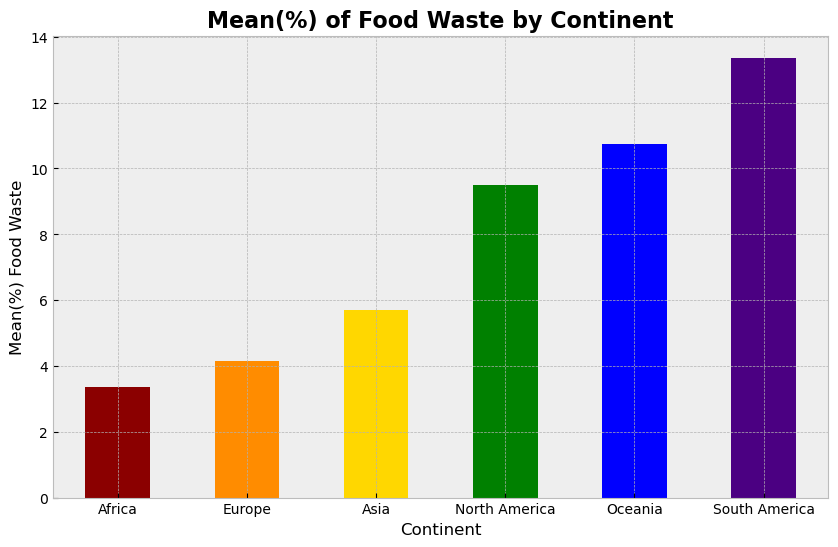

In [71]:
colors = ["#8B0000", "#FF8C00", "#FFD700", "#008000", "#0000FF", "#4B0082", "#EE82EE"]

plt.figure(figsize=(10,6))
plot=continent["Mean_percentage"].plot(kind="bar", color=colors)

plt.title("Mean(%) of Food Waste by Continent", fontweight="bold", fontsize=16)
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Mean(%) Food Waste",fontsize=12)

plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

plt.show()

# Global Waste

## South America

In [72]:
south_america=desperdicio[desperdicio["continent"]=="South America"]
south_america

country       date  loss_percentage loss_percentage_original  \
2177       Chile 2015-01-01             1.30                     1.3%   
2178       Chile 2015-01-01             5.70                     5.7%   
2179       Chile 2013-01-01            13.00                       13   
2180       Chile 1991-01-01            12.00                       12   
2181       Chile 1977-01-01            30.00                       30   
...          ...        ...              ...                      ...   
32199  Venezuela 1991-01-01             1.02                    1.02%   
32200  Venezuela 1991-01-01             0.93                    0.93%   
32201  Venezuela 1991-01-01             0.06                    0.06%   
32202  Venezuela 1991-01-01             1.83                    1.83%   
32203  Venezuela 1977-01-01            17.50                  10.0-25   

      loss_quantity  year      continent continent_code  
2177            NaN  2015  South America             SA  
2178            NaN  2015  South America             SA  
2179            NaN  2013  South America             SA  
2180            NaN  1991  South America             SA  
2181            NaN  1977  South America             SA  
...             ...   ...            ...            ...  
32199          7426  1991  South America             SA  
32200          2865  1991  South America             SA  
32201           363  1991  South America             SA  
32202          3062  1991  South America             SA  
32203           NaN  1977  South America             SA  

[1795 rows x 8 columns]

In [73]:
south_america["country"].value_counts()

Peru                               767
Venezuela                          679
Ecuador                            241
Brazil                              40
Bolivia                             38
Guyana                               6
Chile                                5
Colombia                             5
Latin America and the Caribbean      5
Argentina                            4
Paraguay                             4
Uruguay                              1
Name: country, dtype: int64

In [74]:
# Let´s create a "country_code" column
def country_code(country):
    if country=="Peru":
        return "PER"
    if country=="Venezuela":
        return "VEN"
    if country=="Ecuador":
        return "ECU"
    if country=="Brazil":
        return "BRA"
    if country=="Bolivia":
        return "BOL"
    if country=="Guyana":
        return "GUY"
    if country=="Chile":
        return "CHL"
    if country=="Colombia":
        return "COL"
    if country=="Argentina":
        return "ARG"
    if country=="Paraguay":
        return "PRY"
    if country=="Uruguay":
        return "URY"

In [75]:
south_america["country_code"]=south_america["country"].apply(country_code)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7568\330137213.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
south_america.head()

country       date  loss_percentage loss_percentage_original  \
2177   Chile 2015-01-01              1.3                     1.3%   
2178   Chile 2015-01-01              5.7                     5.7%   
2179   Chile 2013-01-01             13.0                       13   
2180   Chile 1991-01-01             12.0                       12   
2181   Chile 1977-01-01             30.0                       30   

     loss_quantity  year      continent continent_code country_code  
2177           NaN  2015  South America             SA          CHL  
2178           NaN  2015  South America             SA          CHL  
2179           NaN  2013  South America             SA          CHL  
2180           NaN  1991  South America             SA          CHL  
2181           NaN  1977  South America             SA          CHL

In [77]:
desperdicio[desperdicio["continent"]=="South America"]["continent_code"].isna().sum()

0

In [78]:
south_america[south_america["country_code"].isna()]

country       date  loss_percentage  \
13002  Latin America and the Caribbean 2011-01-01             10.0   
13003  Latin America and the Caribbean 2011-01-01             12.0   
13004  Latin America and the Caribbean 2011-01-01             20.0   
13005  Latin America and the Caribbean 2011-01-01             10.0   
13006  Latin America and the Caribbean 2011-01-01             20.0   

      loss_percentage_original loss_quantity  year      continent  \
13002                      10%           NaN  2011  South America   
13003                      12%           NaN  2011  South America   
13004                      20%           NaN  2011  South America   
13005                      10%           NaN  2011  South America   
13006                      20%           NaN  2011  South America   

      continent_code country_code  
13002             SA         None  
13003             SA         None  
13004             SA         None  
13005             SA         None  
13006             SA         None

In [79]:
#Let´s delete the country "Latin America and the Caribbean"
south_america.drop(south_america[south_america["country_code"].isna()].index,inplace=True)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7568\2204177739.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
south_america[south_america["country_code"].isna()]

Empty DataFrame
Columns: [country, date, loss_percentage, loss_percentage_original, loss_quantity, year, continent, continent_code, country_code]
Index: []

In [81]:
# Let´s calculate the mean of "loss_percentage" by each country
south_america_loss=south_america.groupby(["country","country_code"]).agg(Mean_percentage=("loss_percentage","mean"))
south_america_loss.reset_index(inplace=True)
south_america_loss

country country_code  Mean_percentage
0   Argentina          ARG         2.600000
1     Bolivia          BOL         6.324737
2      Brazil          BRA        11.955000
3       Chile          CHL        12.400000
4    Colombia          COL        11.754000
5     Ecuador          ECU         6.080189
6      Guyana          GUY        12.500000
7    Paraguay          PRY        15.875000
8        Peru          PER        21.321134
9     Uruguay          URY        21.700000
10  Venezuela          VEN         7.509764

In [82]:
south_america_loss["Mean_percentage"]=south_america_loss["Mean_percentage"].round(2)

In [83]:
south_america_loss.to_excel("Sout_America.xlsx")

In [84]:
south_america_loss["text"]= south_america_loss["country_code"].astype(str)+"<br>"+"Country"+":"+south_america_loss["country"].astype(str)+"<br>"+"Mean (%) of Food Waste"+":"+south_america_loss["Mean_percentage"].astype(str)+"%"

In [85]:
south_america_loss.sort_values(by="Mean_percentage",inplace=True)

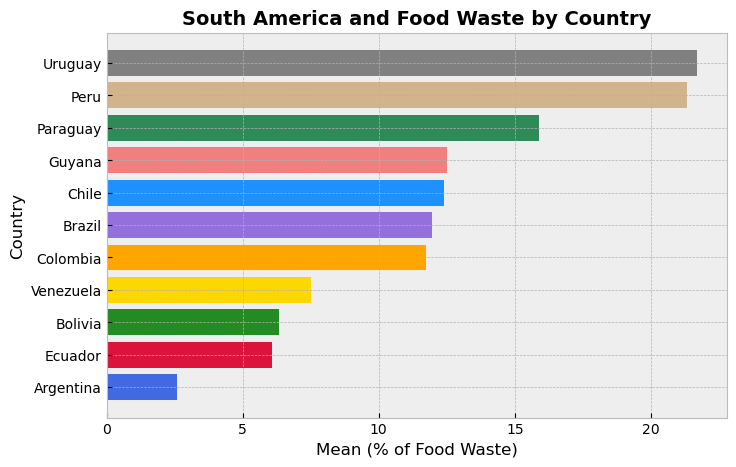

In [86]:
colors = ['royalblue', 'crimson', 'forestgreen', 'gold', 'orange', 
          'mediumpurple', 'dodgerblue', 'lightcoral', 'seagreen', 'tan', 
          'gray', 'darkkhaki', 'limegreen', 'cornflowerblue']
plt.figure(figsize=(8,5))
plt.barh(south_america_loss["country"], south_america_loss["Mean_percentage"],color=colors)

plt.title("South America and Food Waste by Country",fontweight="bold", fontsize=14)
plt.xlabel("Mean (% of Food Waste)",fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel("Country",fontsize=12)
plt.yticks(fontsize=10)

plt.show()

In [87]:
import plotly.offline as py
import plotly.graph_objs as go

layout = dict(geo={'scope': 'south america'},
             title="South America and Food Waste by Country")
data = dict(
    type='choropleth',
    locations=south_america_loss["country_code"],
    locationmode='ISO-3',
    colorscale='OrRd',
    z=south_america_loss["Mean_percentage"],
    text=south_america_loss["text"],
    colorbar=dict(title="Food Waste Mean (%)"))
map = go.Figure(data=[data], layout=layout)
map

## Oceania

In [88]:
oceania=desperdicio[desperdicio["continent"]=="Oceania"]
oceania

country       date  loss_percentage loss_percentage_original  \
6094          Fiji 2018-01-01             4.97                    4.97%   
6095          Fiji 2018-01-01            15.00                      15%   
6096          Fiji 2018-01-01             5.00                       5%   
6097          Fiji 2018-01-01             2.00                       2%   
6098          Fiji 2018-01-01             5.00                       5%   
...            ...        ...              ...                      ...   
17622  New Zealand 1994-01-01             3.98                    3.98%   
17623  New Zealand 1993-01-01             4.01                    4.01%   
17624  New Zealand 1993-01-01             4.05                    4.05%   
17625  New Zealand 1992-01-01             4.02                    4.02%   
17626  New Zealand 1992-01-01             3.99                    3.99%   

      loss_quantity  year continent continent_code  
6094             60  2018   Oceania             OC  
6095           1058  2018   Oceania             OC  
6096           1135  2018   Oceania             OC  
6097           1447  2018   Oceania             OC  
6098            427  2018   Oceania             OC  
...             ...   ...       ...            ...  
17622          2300  1994   Oceania             OC  
17623         15600  1993   Oceania             OC  
17624          2300  1993   Oceania             OC  
17625         12800  1992   Oceania             OC  
17626          2300  1992   Oceania             OC  

[133 rows x 8 columns]

In [89]:
oceania["country"].value_counts()

Fiji                         56
Australia                    43
New Zealand                  25
New Caledonia                 6
Australia and New Zealand     3
Name: country, dtype: int64

In [90]:
oceania.drop(oceania[oceania["country"]=="Australia and New Zealand"].index,inplace=True)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7568\387617911.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
oceania["country"].value_counts()

Fiji             56
Australia        43
New Zealand      25
New Caledonia     6
Name: country, dtype: int64

In [92]:
def country_code_oceania(country):
    if country=="Fiji":
        return "FJI"
    if country=="Australia":
        return "AUS"
    if country=="New Zealand":
        return "NZL"
    if country=="New Caledonia":
        return "NCL"

In [93]:
oceania["country_code"]=oceania["country"].apply(country_code_oceania)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7568\3934375697.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
oceania

country       date  loss_percentage loss_percentage_original  \
6094          Fiji 2018-01-01             4.97                    4.97%   
6095          Fiji 2018-01-01            15.00                      15%   
6096          Fiji 2018-01-01             5.00                       5%   
6097          Fiji 2018-01-01             2.00                       2%   
6098          Fiji 2018-01-01             5.00                       5%   
...            ...        ...              ...                      ...   
17622  New Zealand 1994-01-01             3.98                    3.98%   
17623  New Zealand 1993-01-01             4.01                    4.01%   
17624  New Zealand 1993-01-01             4.05                    4.05%   
17625  New Zealand 1992-01-01             4.02                    4.02%   
17626  New Zealand 1992-01-01             3.99                    3.99%   

      loss_quantity  year continent continent_code country_code  
6094             60  2018   Oceania             OC          FJI  
6095           1058  2018   Oceania             OC          FJI  
6096           1135  2018   Oceania             OC          FJI  
6097           1447  2018   Oceania             OC          FJI  
6098            427  2018   Oceania             OC          FJI  
...             ...   ...       ...            ...          ...  
17622          2300  1994   Oceania             OC          NZL  
17623         15600  1993   Oceania             OC          NZL  
17624          2300  1993   Oceania             OC          NZL  
17625         12800  1992   Oceania             OC          NZL  
17626          2300  1992   Oceania             OC          NZL  

[130 rows x 9 columns]

In [95]:
oceania_loss=oceania.groupby(["country","country_code"]).agg(Mean_percentage=("loss_percentage","mean"))
oceania_loss.reset_index(inplace=True)
oceania_loss.sort_values(by="Mean_percentage",inplace=True)
oceania_loss

country country_code  Mean_percentage
2  New Caledonia          NCL         1.133333
1           Fiji          FJI         5.985714
3    New Zealand          NZL         6.776400
0      Australia          AUS        18.402326

In [96]:
oceania_loss["Mean_percentage"]=oceania_loss["Mean_percentage"].round(2)

In [97]:
oceania_loss.to_excel("Oceania.xlsx")

In [98]:
oceania_loss["text"]= oceania_loss["country_code"].astype(str)+"<br>"+"Country"+":"+oceania_loss["country"].astype(str)+"<br>"+"Mean (%) of Food Waste"+":"+oceania_loss["Mean_percentage"].astype(str)+"%"

In [99]:
oceania_loss

country country_code  Mean_percentage  \
2  New Caledonia          NCL             1.13   
1           Fiji          FJI             5.99   
3    New Zealand          NZL             6.78   
0      Australia          AUS            18.40   

                                                text  
2  NCL<br>Country:New Caledonia<br>Mean (%) of Fo...  
1  FJI<br>Country:Fiji<br>Mean (%) of Food Waste:...  
3  NZL<br>Country:New Zealand<br>Mean (%) of Food...  
0  AUS<br>Country:Australia<br>Mean (%) of Food W...

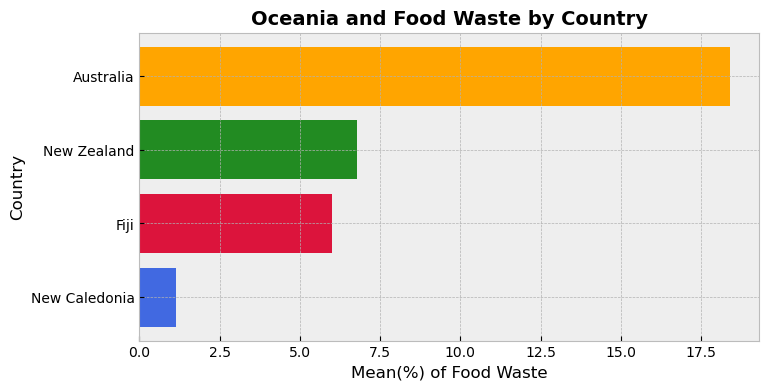

In [100]:
colors = ['royalblue', 'crimson', 'forestgreen', 'orange']
plt.figure(figsize=(8,4))
plt.barh(oceania_loss["country"],oceania_loss["Mean_percentage"], color=colors)

plt.title("Oceania and Food Waste by Country",fontweight="bold", fontsize=14)
plt.xlabel("Mean(%) of Food Waste",fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel("Country",fontsize=12)
plt.yticks(fontsize=10)

plt.show()

## North America

In [101]:
north_america=desperdicio[desperdicio["continent"]=="North America"]
north_america

country       date  loss_percentage  \
886                      Canada 2018-01-01           1.9500   
887                      Canada 2018-01-01           8.0000   
888                      Canada 2017-01-01           1.9500   
889                      Canada 2017-01-01           8.0000   
890                      Canada 2016-01-01           1.9500   
...                         ...        ...              ...   
30783  United States of America 1970-01-01           2.1700   
30784  United States of America 1970-01-01          35.0000   
30785  United States of America 1970-01-01          41.3333   
30786  United States of America 1970-01-01          19.0909   
30787  United States of America 1970-01-01          26.6667   

      loss_percentage_original loss_quantity  year      continent  \
886                      1.95%         11120  2018  North America   
887                         8%        170080  2018  North America   
888                      1.95%         10760  2017  North America   
889                         8%        170210  2017  North America   
890                      1.95%         10360  2016  North America   
...                        ...           ...   ...            ...   
30783                     2.17           NaN  1970  North America   
30784                       35           NaN  1970  North America   
30785                  41.3333           NaN  1970  North America   
30786                  19.0909           NaN  1970  North America   
30787                  26.6667           NaN  1970  North America   

      continent_code  
886               NA  
887               NA  
888               NA  
889               NA  
890               NA  
...              ...  
30783             NA  
30784             NA  
30785             NA  
30786             NA  
30787             NA  

[4688 rows x 8 columns]

In [102]:
north_america["country"].value_counts()

United States of America    3171
Canada                       625
Panama                       468
Guatemala                    106
Cuba                         101
Mexico                        65
Nicaragua                     52
Costa Rica                    22
Jamaica                       20
Dominican Republic            12
Saint Lucia                   10
Honduras                       9
Trinidad and Tobago            9
Northern America               5
El Salvador                    5
Haiti                          4
Belize                         3
Saint Kitts and Nevis          1
Name: country, dtype: int64

In [103]:
north_america.drop(north_america[north_america["country"]=="Northern America"].index,inplace=True)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7568\4223955809.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
def country_code_north_america(country):
    if country=="United States of America":
        return "USA"
    if country=="Canada":
        return "CAN"
    if country=="Panama":
        return "PAN"
    if country=="Guatemala":
        return "GTM"
    if country=="Cuba":
        return "CUB"
    if country=="Mexico":
        return "MEX"
    if country=="Nicaragua":
        return "NIC"
    if country=="Costa Rica":
        return "CRI"
    if country=="Jamaica":
        return "JAM"
    if country=="Dominican Republic":
        return "DOM"
    if country=="Saint Lucia":
        return "LCA"
    if country=="Honduras":
        return "HND"
    if country=="Trinidad and Tobago":
        return "TTO"
    if country=="El Salvador":
        return "SLV"
    if country=="Haiti":
        return "HTI"
    if country=="Belize":
        return "BLZ"
    if country=="Saint Kitts and Nevis":
        return "KNA"

In [105]:
north_america["country_code"]=north_america["country"].apply(country_code_north_america)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7568\505607398.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
north_america["country_code"].isna().sum()

0

In [107]:
north_america_loss=north_america.groupby(["country","country_code"]).agg(Mean_percentage=("loss_percentage","mean"))
north_america_loss.reset_index(inplace=True)
north_america_loss.sort_values(by="Mean_percentage",inplace=True)
north_america_loss

country country_code  Mean_percentage
12                    Panama          PAN         5.066966
3                       Cuba          CUB         5.662574
1                     Canada          CAN         5.744464
5                El Salvador          SLV         6.600000
6                  Guatemala          GTM         9.518443
11                 Nicaragua          NIC         9.572500
16  United States of America          USA        10.609455
8                   Honduras          HND        12.356667
4         Dominican Republic          DOM        13.066667
2                 Costa Rica          CRI        15.217727
14               Saint Lucia          LCA        16.300000
10                    Mexico          MEX        16.556354
9                    Jamaica          JAM        20.344000
15       Trinidad and Tobago          TTO        22.944444
0                     Belize          BLZ        28.333333
13     Saint Kitts and Nevis          KNA        30.000000
7                      Haiti          HTI        42.500000

In [108]:
north_america_loss["Mean_percentage"]=north_america_loss["Mean_percentage"].round(2)

In [109]:
north_america_loss.to_excel("North_America.xlsx")

In [110]:
north_america_loss["text"]= north_america_loss["country_code"].astype(str)+"<br>"+"Country"+":"+north_america_loss["country"].astype(str)+"<br>"+"Mean (%) of Food Waste"+":"+north_america_loss["Mean_percentage"].astype(str)+"%"

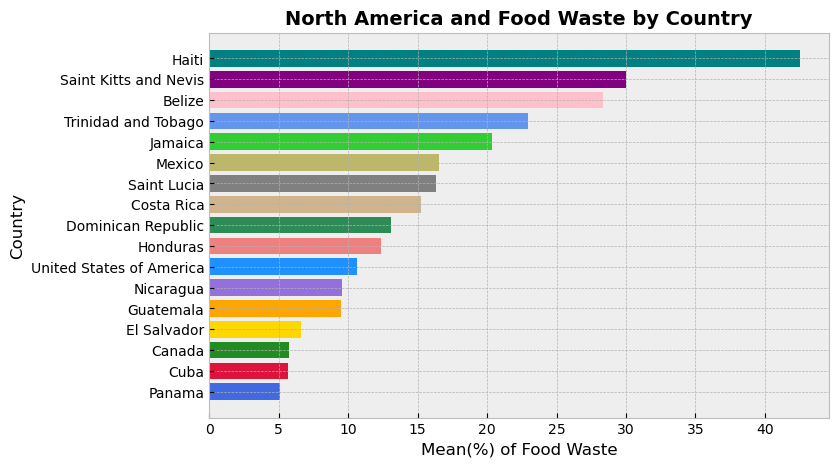

In [111]:
colors = ['royalblue', 'crimson', 'forestgreen', 'gold', 'orange', 'mediumpurple', 'dodgerblue', 'lightcoral', 'seagreen', 'tan', 'gray', 'darkkhaki', 'limegreen', 'cornflowerblue', 'pink', 'purple', 'teal']
plt.figure(figsize=(8,5))
plt.barh(north_america_loss["country"],north_america_loss["Mean_percentage"], color=colors)

plt.title("North America and Food Waste by Country",fontweight="bold",fontsize=14)
plt.xlabel("Mean(%) of Food Waste",fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel("Country",fontsize=12)
plt.yticks(fontsize=10)

plt.show()

In [112]:
layout_na=dict(geo={"scope":"north america"},
                   title="North America and Food Waste by Country")

data_na= dict(
        type="choropleth",
        locations=north_america_loss["country_code"],
        locationmode="ISO-3",
        colorscale="ORrd",
        z=north_america_loss["Mean_percentage"],
        text=north_america_loss["text"],
        colorbar=dict(title="Food Waste Mean (%)"))
map=go.Figure(data=[data_na],layout=layout_na)
map

## ASIA

In [113]:
asia=desperdicio[desperdicio["continent"]=="Asia"]
asia

country       date  loss_percentage loss_percentage_original  \
0         Myanmar 2009-01-01             5.22                    5.22%   
1         Myanmar 2008-01-01             5.43                    5.43%   
2         Myanmar 2007-01-01             5.61                    5.61%   
3         Myanmar 2006-01-01             5.40                     5.4%   
4         Myanmar 2005-01-01             5.00                       5%   
...           ...        ...              ...                      ...   
31520  Uzbekistan 2015-01-01             0.96                    0.96%   
31521  Uzbekistan 2015-01-01             0.20                     0.2%   
31522  Uzbekistan 2014-01-01             0.96                    0.96%   
31523  Uzbekistan 2014-01-01             0.98                    0.98%   
31524  Uzbekistan 2014-01-01             0.20                     0.2%   

      loss_quantity  year continent continent_code  
0             68100  2009      Asia             AS  
1             65240  2008      Asia             AS  
2             61080  2007      Asia             AS  
3             55270  2006      Asia             AS  
4             51970  2005      Asia             AS  
...             ...   ...       ...            ...  
31520         25800  2015      Asia             AS  
31521         18100  2015      Asia             AS  
31522         13900  2014      Asia             AS  
31523         24000  2014      Asia             AS  
31524         16800  2014      Asia             AS  

[3773 rows x 8 columns]

In [114]:
asia["country"].value_counts()

India                 1218
Bangladesh             560
Japan                  242
Pakistan               178
Armenia                158
Kazakhstan             142
Sri Lanka              139
Nepal                  130
China                  124
Indonesia              115
Iran                   113
Azerbaijan             102
Georgia                 88
South Korea             60
Philippines             54
Cambodia                48
Jordan                  37
Thailand                35
Afghanistan             32
Israel                  23
Vietnam                 20
Malaysia                16
Mongolia                15
Syria                   15
Uzbekistan              15
Turkey                  14
Myanmar                 13
Saudi Arabia            12
Timor-Leste             11
Kyrgyzstan              10
North Korea              5
South-Eastern Asia       5
Southern Asia            5
Western Asia             5
Central Asia             5
Laos                     4
Tajikistan               3
B

In [115]:
def country_code_asia(country):
    if country=="India": 
        return "IND"
    if country=="Bangladesh": 
        return "BGD"
    if country=="Japan": 
        return "JPN"
    if country=="Pakistan": 
        return "PAK"
    if country=="Armenia": 
        return "ARM"
    if country=="Kazakhstan": 
        return "KAZ"
    if country=="Sri Lanka": 
        return "LKA"
    if country=="Nepal": 
        return "NPL"
    if country=="China": 
        return "CHN"
    if country=="Indonesia": 
        return "IDN"
    if country=="Iran": 
        return "IRN"
    if country=="Azerbaijan": 
        return "AZE"
    if country=="Georgia": 
        return "GEO"
    if country=="South Korea": 
        return "KOR"
    if country=="Philippines": 
        return "PHL"
    if country=="Cambodia": 
        return "KHM"
    if country=="Jordan": 
        return "JOR"
    if country=="Thailand": 
        return "THA"
    if country=="Afghanistan": 
        return "AFG"
    if country=="Israel":
        return "ISR"
    if country=="Vietnam": 
        return "VNM"
    if country=="Malaysia": 
        return "MYS"
    if country=="Syria": 
        return "SYR"
    if country=="Mongolia": 
        return "MNG"
    if country=="Uzbekistan": 
        return "UZB"
    if country=="Turkey": 
        return "TUR"
    if country=="Myanmar": 
        return "MMR"
    if country=="Saudi Arabia": 
        return "SAU"
    if country=="Timor-Leste": 
        return "TLS"
    if country=="Kyrgyzstan": 
        return "KGZ"
    if country=="North Korea": 
        return "PRK"
    if country=="South-Eastern Asia": 
        return "SEA"
    if country=="Southern Asia": 
        return "SAS"
    if country=="Western Asia": 
        return "WST"
    if country=="Central Asia": 
        return "CTA"
    if country=="Laos": 
        return "LAO"
    if country=="Tajikistan": 
        return "TJK"
    if country=="Oman": 
        return "OMN"
    if country=="Bahrain": 
        return "BHR"

In [116]:
asia["country_code"]=asia["country"].apply(country_code_asia)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7568\1843144325.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
asia["country_code"].isna().sum()

0

In [118]:
asia_loss=asia.groupby(["country","country_code"]).agg(Mean_percentage=("loss_percentage","mean"))
asia_loss.reset_index(inplace=True)
asia_loss.sort_values(by="Mean_percentage",inplace=True)
asia_loss

country country_code  Mean_percentage
36          Uzbekistan          UZB         0.724000
19            Mongolia          MNG         1.203333
13               Japan          JPN         2.829793
9                India          IND         3.116288
16          Kyrgyzstan          KGZ         3.425000
8              Georgia          GEO         3.497614
34         Timor-Leste          TLS         3.772727
20             Myanmar          MMR         4.143077
2           Azerbaijan          AZE         4.425784
15          Kazakhstan          KAZ         4.624437
12              Israel          ISR         5.976957
10           Indonesia          IDN         6.267087
35              Turkey          TUR         6.432143
11                Iran          IRN         6.532920
18            Malaysia          MYS         6.562500
14              Jordan          JOR         6.760000
4           Bangladesh          BGD         6.815565
24            Pakistan          PAK         7.260871
5             Cambodia          KHM         7.479167
32          Tajikistan          TJK         7.706667
7                China          CHN         7.716048
25         Philippines          PHL         8.091852
37             Vietnam          VNM         8.174000
30           Sri Lanka          LKA         8.559496
1              Armenia          ARM         9.583354
27         South Korea          KOR        10.226000
21               Nepal          NPL        10.368923
33            Thailand          THA        10.791143
17                Laos          LAO        12.125000
0          Afghanistan          AFG        13.122813
28  South-Eastern Asia          SEA        13.200000
29       Southern Asia          SAS        13.200000
31               Syria          SYR        13.332000
6         Central Asia          CTA        14.800000
38        Western Asia          WST        14.800000
22         North Korea          PRK        15.052000
26        Saudi Arabia          SAU        17.291667
3              Bahrain          BHR        25.000000
23                Oman          OMN        35.000000

In [119]:
asia_loss["Mean_percentage"]=asia_loss["Mean_percentage"].round(2)

In [120]:
asia_loss.to_excel("Asia.xlsx")

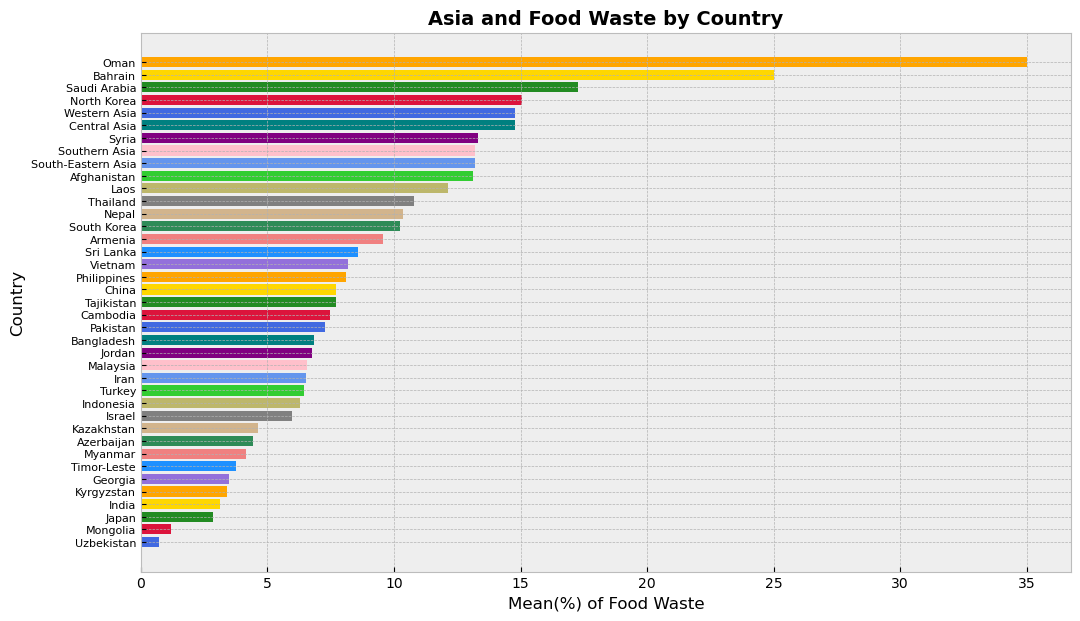

In [121]:
colors = ['royalblue', 'crimson', 'forestgreen', 'gold', 'orange', 'mediumpurple', 'dodgerblue', 'lightcoral', 'seagreen', 'tan', 'gray', 'darkkhaki', 'limegreen', 'cornflowerblue', 'pink', 'purple', 'teal']
plt.figure(figsize=(12,7))
plt.barh(asia_loss["country"],asia_loss["Mean_percentage"], color=colors)

plt.title("Asia and Food Waste by Country",fontweight="bold",fontsize=14)
plt.xlabel("Mean(%) of Food Waste",fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel("Country",fontsize=12)
plt.yticks(fontsize=8)

plt.show()

In [122]:
asia_loss["text"]= asia_loss["country_code"].astype(str)+"<br>"+"Country"+":"+asia_loss["country"].astype(str)+"<br>"+"Mean (%) of Food Waste"+":"+asia_loss["Mean_percentage"].astype(str)+"%"

In [123]:
layout_asia=dict(geo={"scope":"asia"},
                   title="Asia and Food Waste by Country")

data_asia= dict(
        type="choropleth",
        locations=asia_loss["country_code"],
        locationmode="ISO-3",
        colorscale="ORrd",
        z=asia_loss["Mean_percentage"],
        text=asia_loss["text"],
        colorbar=dict(title="Food Waste Mean (%)"))
map=go.Figure(data=[data_asia],layout=layout_asia)
map

## Europe

In [124]:
europe=desperdicio[desperdicio["continent"]=="Europe"]
europe

country       date  loss_percentage loss_percentage_original  \
501           Belarus 2007-01-01             0.01                    0.01%   
502           Belarus 2006-01-01             0.02                    0.02%   
503           Belarus 2005-01-01             0.02                    0.02%   
504           Belarus 2004-01-01             0.02                    0.02%   
505           Belarus 2003-01-01             0.02                    0.02%   
...               ...        ...              ...                      ...   
27055  United Kingdom 1991-01-01            19.07                   19.07%   
27056  United Kingdom 1991-01-01            16.68                   16.68%   
27057  United Kingdom 1991-01-01            14.12                   14.12%   
27058  United Kingdom 1991-01-01             7.35                    7.35%   
27059  United Kingdom 1991-01-01             1.47                    1.47%   

      loss_quantity  year continent continent_code  
501             400  2007    Europe             EU  
502            1000  2006    Europe             EU  
503            1000  2005    Europe             EU  
504            1000  2004    Europe             EU  
505            1000  2003    Europe             EU  
...             ...   ...       ...            ...  
27055         57040  1991    Europe             EU  
27056        108886  1991    Europe             EU  
27057         35386  1991    Europe             EU  
27058         23758  1991    Europe             EU  
27059          9300  1991    Europe             EU  

[2982 rows x 8 columns]

In [125]:
europe["country"].value_counts()

Austria            468
Hungary            435
Germany            287
United Kingdom     221
Denmark            165
France             161
Switzerland        135
Ukraine            129
Poland             125
Netherlands        113
Lithuania           95
Sweden              80
Russia              72
Ireland             65
Finland             58
Romania             56
Spain               52
Estonia             46
Norway              33
North Macedonia     28
Serbia              22
Latvia              21
Belarus             19
Italy               18
Moldava             16
Slovakia            15
Europe              14
Portugal            13
Belgium             11
Luxembourg           4
Czechia              4
Cyprus               1
Name: country, dtype: int64

In [126]:
europe.drop(europe[europe["country"]=="Europe"].index,inplace=True)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7568\236802286.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
def get_iso3(country):
    if country == 'Austria':
        return 'AUT'
    elif country == 'Hungary':
        return 'HUN'
    elif country == 'Germany':
        return 'DEU'
    elif country == 'United Kingdom':
        return 'GBR'
    elif country == 'Denmark':
        return 'DNK'
    elif country == 'France':
        return 'FRA'
    elif country == 'Switzerland':
        return 'CHE'
    elif country == 'Ukraine':
        return 'UKR'
    elif country == 'Poland':
        return 'POL'
    elif country == 'Netherlands':
        return 'NLD'
    elif country == 'Lithuania':
        return 'LTU'
    elif country == 'Sweden':
        return 'SWE'
    elif country == 'Russia':
        return 'RUS'
    elif country == 'Ireland':
        return 'IRL'
    elif country == 'Finland':
        return 'FIN'
    elif country == 'Romania':
        return 'ROU'
    elif country == 'Spain':
        return 'ESP'
    elif country == 'Estonia':
        return 'EST'
    elif country == 'Norway':
        return 'NOR'
    elif country == 'North Macedonia':
        return 'MKD'
    elif country == 'Serbia':
        return 'SRB'
    elif country == 'Latvia':
        return 'LVA'
    elif country == 'Belarus':
        return 'BLR'
    elif country == 'Italy':
        return 'ITA'
    elif country == 'Moldava':
        return 'MDA'
    elif country == 'Slovakia':
        return 'SVK'
    elif country == 'Portugal':
        return 'PRT'
    elif country == "Belgium":
        return 'BEL'
    elif country == 'Luxembourg':
        return 'LUX'
    elif country == 'Czechia':
        return 'CZE'
    elif country == 'Cyprus':
        return 'CYP'

In [128]:
europe["country_code"]=europe["country"].apply(get_iso3)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7568\2878632524.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [129]:
europe

country       date  loss_percentage loss_percentage_original  \
501           Belarus 2007-01-01             0.01                    0.01%   
502           Belarus 2006-01-01             0.02                    0.02%   
503           Belarus 2005-01-01             0.02                    0.02%   
504           Belarus 2004-01-01             0.02                    0.02%   
505           Belarus 2003-01-01             0.02                    0.02%   
...               ...        ...              ...                      ...   
27055  United Kingdom 1991-01-01            19.07                   19.07%   
27056  United Kingdom 1991-01-01            16.68                   16.68%   
27057  United Kingdom 1991-01-01            14.12                   14.12%   
27058  United Kingdom 1991-01-01             7.35                    7.35%   
27059  United Kingdom 1991-01-01             1.47                    1.47%   

      loss_quantity  year continent continent_code country_code  
501             400  2007    Europe             EU          BLR  
502            1000  2006    Europe             EU          BLR  
503            1000  2005    Europe             EU          BLR  
504            1000  2004    Europe             EU          BLR  
505            1000  2003    Europe             EU          BLR  
...             ...   ...       ...            ...          ...  
27055         57040  1991    Europe             EU          GBR  
27056        108886  1991    Europe             EU          GBR  
27057         35386  1991    Europe             EU          GBR  
27058         23758  1991    Europe             EU          GBR  
27059          9300  1991    Europe             EU          GBR  

[2968 rows x 9 columns]

In [130]:
europe_loss=europe.groupby(["country","country_code"]).agg(Mean_percentage=("loss_percentage","mean"))
europe_loss.reset_index(inplace=True)
europe_loss.sort_values(by="Mean_percentage",inplace=True)
europe_loss

country country_code  Mean_percentage
1           Belarus          BLR         0.074211
4           Czechia          CZE         0.485000
13           Latvia          LVA         0.501905
3            Cyprus          CYP         0.920000
24           Serbia          SRB         1.092273
6           Estonia          EST         1.298478
16          Moldava          MDA         1.560000
10          Hungary          HUN         1.651379
17      Netherlands          NLD         1.809292
26            Spain          ESP         1.871538
23           Russia          RUS         1.880000
22          Romania          ROU         1.886964
28      Switzerland          CHE         1.949304
9           Germany          DEU         2.523902
8            France          FRA         2.852733
21         Portugal          PRT         2.946154
14        Lithuania          LTU         3.313053
25         Slovakia          SVK         3.517333
11          Ireland          IRL         4.211692
30   United Kingdom          GBR         4.661538
18  North Macedonia          MKD         5.060357
29          Ukraine          UKR         5.232519
20           Poland          POL         5.561120
5           Denmark          DNK         6.109697
2           Belgium          BEL         6.230000
12            Italy          ITA         6.419444
0           Austria          AUT         7.059979
15       Luxembourg          LUX         7.817500
19           Norway          NOR         8.108182
27           Sweden          SWE        10.413750
7           Finland          FIN        11.328448

In [131]:
europe_loss["Mean_percentage"]=europe_loss["Mean_percentage"].round(2)

In [132]:
europe_loss.to_excel("Europe.xlsx")

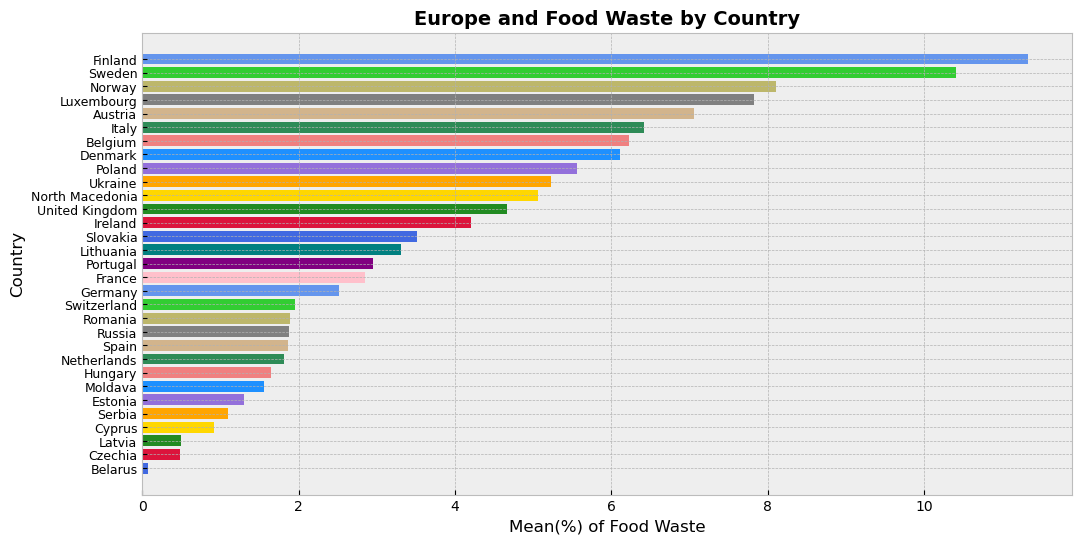

In [133]:
colors = ['royalblue', 'crimson', 'forestgreen', 'gold', 'orange', 'mediumpurple', 'dodgerblue', 'lightcoral', 'seagreen', 'tan', 'gray', 'darkkhaki', 'limegreen', 'cornflowerblue', 'pink', 'purple', 'teal']
plt.figure(figsize=(12,6))
plt.barh(europe_loss["country"],europe_loss["Mean_percentage"], color=colors)

plt.title("Europe and Food Waste by Country",fontweight="bold",fontsize=14)
plt.xlabel("Mean(%) of Food Waste",fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel("Country",fontsize=12)
plt.yticks(fontsize=9)

plt.show()

In [134]:
europe_loss["text"]= europe_loss["country_code"].astype(str)+"<br>"+"Country"+":"+europe_loss["country"].astype(str)+"<br>"+"Mean (%) of Food Waste"+":"+europe_loss["Mean_percentage"].astype(str)+"%"

In [135]:
layout_er=dict(geo={"scope":"europe"},
                   title="Europe and Food Waste by Country")

data_er= dict(
        type="choropleth",
        locations=europe_loss["country_code"],
        locationmode="ISO-3",
        colorscale="ORrd",
        z=europe_loss["Mean_percentage"],
        text=europe_loss["text"],
        colorbar=dict(title="Food Waste Mean (%)"))
map=go.Figure(data=[data_er],layout=layout_er)
map

## Africa

In [136]:
africa=desperdicio[desperdicio["continent"]=="Africa"]
africa

country       date  loss_percentage loss_percentage_original  \
13     Burundi 2020-01-01             3.50                      3.5   
14     Burundi 2020-01-01             4.87                     4.87   
15     Burundi 2020-01-01             2.50                      2.5   
16     Burundi 2020-01-01             4.43                     4.43   
17     Burundi 2020-01-01             4.00                        4   
...        ...        ...              ...                      ...   
32942   Zambia 1977-01-01             4.05                  1.7-6.4   
32943   Zambia 1977-01-01             3.00                        3   
32944   Zambia 1977-01-01             3.50                    2.0-5   
32945   Zambia 1977-01-01            13.00                       13   
32946   Zambia 1977-01-01             9.00                        9   

      loss_quantity  year continent continent_code  
13              NaN  2020    Africa             AF  
14              NaN  2020    Africa             AF  
15              NaN  2020    Africa             AF  
16              NaN  2020    Africa             AF  
17              NaN  2020    Africa             AF  
...             ...   ...       ...            ...  
32942           NaN  1977    Africa             AF  
32943           NaN  1977    Africa             AF  
32944           NaN  1977    Africa             AF  
32945           NaN  1977    Africa             AF  
32946           NaN  1977    Africa             AF  

[19576 rows x 8 columns]

In [137]:
africa["country"].value_counts()

Ethiopia                            933
Kenya                               899
Uganda                              798
Senegal                             765
Malawi                              757
Ghana                               755
Zambia                              743
Burkina Faso                        721
Angola                              693
Benin                               678
Mali                                624
Rwanda                              566
Mozambique                          559
Tanzania                            554
Nigeria                             539
Togo                                523
Gambia                              506
Guinea-Bissau                       505
Chad                                498
Burundi                             484
Zimbabwe                            475
Mauritania                          462
Eritrea                             441
Democratic Republic of the Congo    423
Ivory Coast                         406


In [138]:
def get_ISO3_africa(country_name):
    if country_name == 'Ethiopia':
        return 'ETH'
    elif country_name == 'Kenya':
        return 'KEN'
    elif country_name == 'Uganda':
        return 'UGA'
    elif country_name == 'Senegal':
        return 'SEN'
    elif country_name == 'Malawi':
        return 'MWI'
    elif country_name == 'Ghana':
        return 'GHA'
    elif country_name == 'Zambia':
        return 'ZMB'
    elif country_name == 'Burkina Faso':
        return 'BFA'
    elif country_name == 'Angola':
        return 'AGO'
    elif country_name == 'Benin':
        return 'BEN'
    elif country_name == 'Mali':
        return 'MLI'
    elif country_name == 'Rwanda':
        return 'RWA'
    elif country_name == 'Mozambique':
        return 'MOZ'
    elif country_name == 'Tanzania':
        return 'TZA'
    elif country_name == 'Nigeria':
        return 'NGA'
    elif country_name == 'Togo':
        return 'TGO'
    elif country_name == 'Gambia':
        return 'GMB'
    elif country_name == 'Guinea-Bissau':
        return 'GNB'
    elif country_name == 'Chad':
        return 'TCD'
    elif country_name == 'Burundi':
        return 'BDI'
    elif country_name == 'Zimbabwe':
        return 'ZWE'
    elif country_name == 'Mauritania':
        return 'MRT'
    elif country_name == 'Eritrea':
        return 'ERI'
    elif country_name == 'Democratic Republic of the Congo':
        return 'COD'
    elif country_name == 'Ivory Coast':
        return 'CIV'
    elif country_name == 'Guinea':
        return 'GIN'
    elif country_name == 'Botswana':
        return 'BWA'
    elif country_name == 'Niger':
        return 'NER'
    elif country_name == 'Somalia':
        return 'SOM'
    elif country_name == 'South Africa':
        return 'ZAF'
    elif country_name == 'Namibia':
        return 'NAM'
    elif country_name == 'Cameroon':
        return 'CMR'
    elif country_name == 'Lesotho':
        return 'LSO'
    elif country_name == 'Sierra Leone':
        return 'SLE'
    elif country_name == 'Sudan':
        return 'SDN'
    elif country_name == 'Eswatini':
        return 'SWZ'
    elif country_name == 'South Sudan':
        return 'SSD'
    elif country_name == 'Egypt':
        return 'EGY'
    elif country_name == 'Madagascar':
        return 'MDG'
    elif country_name == 'Liberia':
        return 'LBR'
    elif country_name == 'Mauritius':
        return 'MUS'
    elif country_name == 'Libya':
        return 'LBY'
    elif country_name == 'Tunisia':
        return 'TUN'
    elif country_name == 'Sub-Saharan Africa':
        return 'SSA'
    elif country_name == 'Northern Africa':
        return 'NAF'
    elif country_name == 'Western Africa':
        return 'WAF'
    elif country_name == 'Algeria':
        return 'DZA'

In [139]:
africa["country_code"]=africa["country"].apply(get_ISO3_africa)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7568\1275913505.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
africa

country       date  loss_percentage loss_percentage_original  \
13     Burundi 2020-01-01             3.50                      3.5   
14     Burundi 2020-01-01             4.87                     4.87   
15     Burundi 2020-01-01             2.50                      2.5   
16     Burundi 2020-01-01             4.43                     4.43   
17     Burundi 2020-01-01             4.00                        4   
...        ...        ...              ...                      ...   
32942   Zambia 1977-01-01             4.05                  1.7-6.4   
32943   Zambia 1977-01-01             3.00                        3   
32944   Zambia 1977-01-01             3.50                    2.0-5   
32945   Zambia 1977-01-01            13.00                       13   
32946   Zambia 1977-01-01             9.00                        9   

      loss_quantity  year continent continent_code country_code  
13              NaN  2020    Africa             AF          BDI  
14              NaN  2020    Africa             AF          BDI  
15              NaN  2020    Africa             AF          BDI  
16              NaN  2020    Africa             AF          BDI  
17              NaN  2020    Africa             AF          BDI  
...             ...   ...       ...            ...          ...  
32942           NaN  1977    Africa             AF          ZMB  
32943           NaN  1977    Africa             AF          ZMB  
32944           NaN  1977    Africa             AF          ZMB  
32945           NaN  1977    Africa             AF          ZMB  
32946           NaN  1977    Africa             AF          ZMB  

[19576 rows x 9 columns]

In [141]:
africa_loss=africa.groupby(["country","country_code"]).agg(Mean_percentage=("loss_percentage","mean"))
africa_loss.reset_index(inplace=True)
africa_loss.sort_values(by="Mean_percentage",inplace=True)
africa_loss

country country_code  Mean_percentage
26                         Mauritius          MUS         2.012475
28                           Namibia          NAM         2.192738
20                           Liberia          LBR         2.371524
22                        Madagascar          MDG         2.438130
1                             Angola          AGO         2.524978
3                           Botswana          BWA         2.647469
4                       Burkina Faso          BFA         2.660208
35                           Somalia          SOM         2.712725
27                        Mozambique          MOZ         2.725903
36                      South Africa          ZAF         2.763479
45                            Zambia          ZMB         2.764145
8   Democratic Republic of the Congo          COD         2.841986
6                           Cameroon          CMR         2.886203
13                            Gambia          GMB         2.902055
23                            Malawi          MWI         2.921598
16                     Guinea-Bissau          GNB         2.931960
43                            Uganda          UGA         2.936805
25                        Mauritania          MRT         2.967273
29                             Niger          NER         2.989478
10                           Eritrea          ERI         3.029456
12                          Ethiopia          ETH         3.053674
15                            Guinea          GIN         3.088400
11                          Eswatini          SWZ         3.096267
19                           Lesotho          LSO         3.098856
46                          Zimbabwe          ZWE         3.126126
17                       Ivory Coast          CIV         3.138300
33                           Senegal          SEN         3.165542
5                            Burundi          BDI         3.179008
37                       South Sudan          SSD         3.192585
7                               Chad          TCD         3.217992
24                              Mali          MLI         3.234872
34                      Sierra Leone          SLE         3.276502
41                              Togo          TGO         3.569732
18                             Kenya          KEN         3.660723
39                             Sudan          SDN         3.669532
44                    Western Africa          WAF         3.750000
32                            Rwanda          RWA         4.165972
30                           Nigeria          NGA         4.323135
40                          Tanzania          TZA         4.525217
2                              Benin          BEN         5.134764
14                             Ghana          GHA         5.921623
42                           Tunisia          TUN         6.685714
38                Sub-Saharan Africa          SSA         7.595833
9                              Egypt          EGY         9.701844
31                   Northern Africa          NAF        14.800000
0                            Algeria          DZA        17.500000
21                             Libya          LBY        18.640000

In [142]:
africa_loss["Mean_percentage"]=africa_loss["Mean_percentage"].round(2)

In [143]:
africa_loss.to_excel("Africa.xlsx")

In [144]:
colors = ['royalblue', 'crimson', 'forestgreen', 'gold', 'orange', 'mediumpurple', 'dodgerblue', 'lightcoral', 'seagreen', 'tan', 'gray', 'darkkhaki', 'limegreen', 'cornflowerblue', 'pink', 'purple', 'teal']
plt.figure(figsize=(12,9))
plt.barh(africa_loss["country"],africa_loss["Mean_percentage"], color=colors)

plt.title("Africa and Food Waste by Country",fontweight="bold",fontsize=14)
plt.xlabel("Mean(%) of Food Waste",fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel("Country",fontsize=12)
plt.yticks(fontsize=9)

plt.show()

In [145]:
africa_loss["text"]= africa_loss["country_code"].astype(str)+"<br>"+"Country"+":"+africa_loss["country"].astype(str)+"<br>"+"Mean (%) of Food Waste"+":"+africa_loss["Mean_percentage"].astype(str)+"%"

In [146]:
layout_af=dict(geo={"scope":"africa"},
                   title="Africa and Food Waste by Country")

data_af= dict(
        type="choropleth",
        locations=africa_loss["country_code"],
        locationmode="ISO-3",
        colorscale="ORrd",
        z=africa_loss["Mean_percentage"],
        text=africa_loss["text"],
        colorbar=dict(title="Food Waste Mean (%)"))
map=go.Figure(data=[data_af],layout=layout_af)
map

## Global Food Waste Map

In [147]:
south_america_loss.head()

country country_code  Mean_percentage  \
0   Argentina          ARG             2.60   
5     Ecuador          ECU             6.08   
1     Bolivia          BOL             6.32   
10  Venezuela          VEN             7.51   
4    Colombia          COL            11.75   

                                                 text  
0   ARG<br>Country:Argentina<br>Mean (%) of Food W...  
5   ECU<br>Country:Ecuador<br>Mean (%) of Food Was...  
1   BOL<br>Country:Bolivia<br>Mean (%) of Food Was...  
10  VEN<br>Country:Venezuela<br>Mean (%) of Food W...  
4   COL<br>Country:Colombia<br>Mean (%) of Food Wa...

In [148]:
oceania_loss.head()

country country_code  Mean_percentage  \
2  New Caledonia          NCL             1.13   
1           Fiji          FJI             5.99   
3    New Zealand          NZL             6.78   
0      Australia          AUS            18.40   

                                                text  
2  NCL<br>Country:New Caledonia<br>Mean (%) of Fo...  
1  FJI<br>Country:Fiji<br>Mean (%) of Food Waste:...  
3  NZL<br>Country:New Zealand<br>Mean (%) of Food...  
0  AUS<br>Country:Australia<br>Mean (%) of Food W...

In [149]:
north_america_loss.head()

country country_code  Mean_percentage  \
12       Panama          PAN             5.07   
3          Cuba          CUB             5.66   
1        Canada          CAN             5.74   
5   El Salvador          SLV             6.60   
6     Guatemala          GTM             9.52   

                                                 text  
12  PAN<br>Country:Panama<br>Mean (%) of Food Wast...  
3   CUB<br>Country:Cuba<br>Mean (%) of Food Waste:...  
1   CAN<br>Country:Canada<br>Mean (%) of Food Wast...  
5   SLV<br>Country:El Salvador<br>Mean (%) of Food...  
6   GTM<br>Country:Guatemala<br>Mean (%) of Food W...

In [150]:
asia_loss.head()

country country_code  Mean_percentage  \
36  Uzbekistan          UZB             0.72   
19    Mongolia          MNG             1.20   
13       Japan          JPN             2.83   
9        India          IND             3.12   
16  Kyrgyzstan          KGZ             3.42   

                                                 text  
36  UZB<br>Country:Uzbekistan<br>Mean (%) of Food ...  
19  MNG<br>Country:Mongolia<br>Mean (%) of Food Wa...  
13  JPN<br>Country:Japan<br>Mean (%) of Food Waste...  
9   IND<br>Country:India<br>Mean (%) of Food Waste...  
16  KGZ<br>Country:Kyrgyzstan<br>Mean (%) of Food ...

In [151]:
europe_loss.head()

country country_code  Mean_percentage  \
1   Belarus          BLR             0.07   
4   Czechia          CZE             0.48   
13   Latvia          LVA             0.50   
3    Cyprus          CYP             0.92   
24   Serbia          SRB             1.09   

                                                 text  
1   BLR<br>Country:Belarus<br>Mean (%) of Food Was...  
4   CZE<br>Country:Czechia<br>Mean (%) of Food Was...  
13  LVA<br>Country:Latvia<br>Mean (%) of Food Wast...  
3   CYP<br>Country:Cyprus<br>Mean (%) of Food Wast...  
24  SRB<br>Country:Serbia<br>Mean (%) of Food Wast...

In [152]:
africa_loss.head()

country country_code  Mean_percentage  \
26   Mauritius          MUS             2.01   
28     Namibia          NAM             2.19   
20     Liberia          LBR             2.37   
22  Madagascar          MDG             2.44   
1       Angola          AGO             2.52   

                                                 text  
26  MUS<br>Country:Mauritius<br>Mean (%) of Food W...  
28  NAM<br>Country:Namibia<br>Mean (%) of Food Was...  
20  LBR<br>Country:Liberia<br>Mean (%) of Food Was...  
22  MDG<br>Country:Madagascar<br>Mean (%) of Food ...  
1   AGO<br>Country:Angola<br>Mean (%) of Food Wast...

In [153]:
world_loss=pd.concat([south_america_loss,oceania_loss,north_america_loss,asia_loss,europe_loss,africa_loss])

In [154]:
world_loss

country country_code  Mean_percentage  \
0            Argentina          ARG             2.60   
5              Ecuador          ECU             6.08   
1              Bolivia          BOL             6.32   
10           Venezuela          VEN             7.51   
4             Colombia          COL            11.75   
..                 ...          ...              ...   
38  Sub-Saharan Africa          SSA             7.60   
9                Egypt          EGY             9.70   
31     Northern Africa          NAF            14.80   
0              Algeria          DZA            17.50   
21               Libya          LBY            18.64   

                                                 text  
0   ARG<br>Country:Argentina<br>Mean (%) of Food W...  
5   ECU<br>Country:Ecuador<br>Mean (%) of Food Was...  
1   BOL<br>Country:Bolivia<br>Mean (%) of Food Was...  
10  VEN<br>Country:Venezuela<br>Mean (%) of Food W...  
4   COL<br>Country:Colombia<br>Mean (%) of Food Wa...  
..                                                ...  
38  SSA<br>Country:Sub-Saharan Africa<br>Mean (%) ...  
9   EGY<br>Country:Egypt<br>Mean (%) of Food Waste...  
31  NAF<br>Country:Northern Africa<br>Mean (%) of ...  
0   DZA<br>Country:Algeria<br>Mean (%) of Food Was...  
21  LBY<br>Country:Libya<br>Mean (%) of Food Waste...  

[149 rows x 4 columns]

In [155]:
world_loss["Mean_percentage"]=world_loss["Mean_percentage"].round(2)

In [156]:
world_loss.to_excel("World.xlsx")

In [157]:
layout_er=dict(geo={"scope":"world"},
                   title="World and Food Waste by Country")

data_er= dict(
        type="choropleth",
        locations=world_loss["country_code"],
        locationmode="ISO-3",
        colorscale="ORrd",
        z=world_loss["Mean_percentage"],
        text=world_loss["text"],
        colorbar=dict(title="Food Waste Mean (%)"))
map=go.Figure(data=[data_er],layout=layout_er)
map